## 知乎问题统计
用jieba 分词问题后统计下问题的内容

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(style="whitegrid")
sns.set_style('whitegrid', {'font.sans-serif':['simhei']})

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

pd.options.mode.chained_assignment = None


In [2]:
df = pd.read_csv('data/zhihu_token_count.csv', header=None, names=['token', 'token_count'])
df = df.sort_values(by=['token_count'], ascending=False)
print(df.columns)
print(df.head(20))

Index(['token', 'token_count'], dtype='object')
        token  token_count
221484      ？     13828148
705919      的      8711569
332050      ，      7531755
609193             2417348
1085648     是      2402857
244485      吗      2085979
35072       有      2048634
626007     什么      1992906
247454     如何      1845242
735180      了      1558460
854186      在      1442903
1026693     我      1351919
347527    为什么      1234458
2451        ?      1230969
742591      和      1156506
915177     怎么      1107564
349892      你       899820
14656       不       877766
127381      人       839405
124488     一个       789638


In [3]:
stop_words_set = set()

def add_stop_word(filename):
    with open(filename, 'r') as f:
        for w in f.readlines():
            stop_words_set.add(w.strip())

add_stop_word('data/stop_words.txt')
add_stop_word('data/sichuanU_stop_words.txt')
add_stop_word('data/baidu_stop_words.txt')
add_stop_word('data/hagongU_stop_words.txt')
       
stop_words_set.add(' ')     
print(len(stop_words_set))

2313


In [4]:
def is_stop_word(word):
    if word in stop_words_set:
        return True
    return False

df['is_stop'] = df['token'].apply(is_stop_word)

df_no_stop_word = df[df.is_stop == False]
print(df_no_stop_word.head(50).set_index('token'))

       token_count  is_stop
token                      
想           626754    False
做           517715    False
中           420571    False
看待          391976    False
请问          378865    False
说           371354    False
喜欢          369189    False
评价          355659    False
有没有         326796    False
推荐          282735    False
工作          272744    False
中国          272093    False
专业          266973    False
买           262665    False
求           261022    False
女生          260257    False
大学          252238    False
里           218708    False
真的          212070    False
年           206395    False
体验          205703    False
感觉          202819    False
公司          201260    False
手机          187488    False
选择          184341    False
男生          175976    False
一种          171154    False
男朋友         168387    False
朋友          165904    False
学习          163193    False
没           162309    False
时           156420    False
吃           142251    False
月           140270  

### 词云图

Populating the interactive namespace from numpy and matplotlib


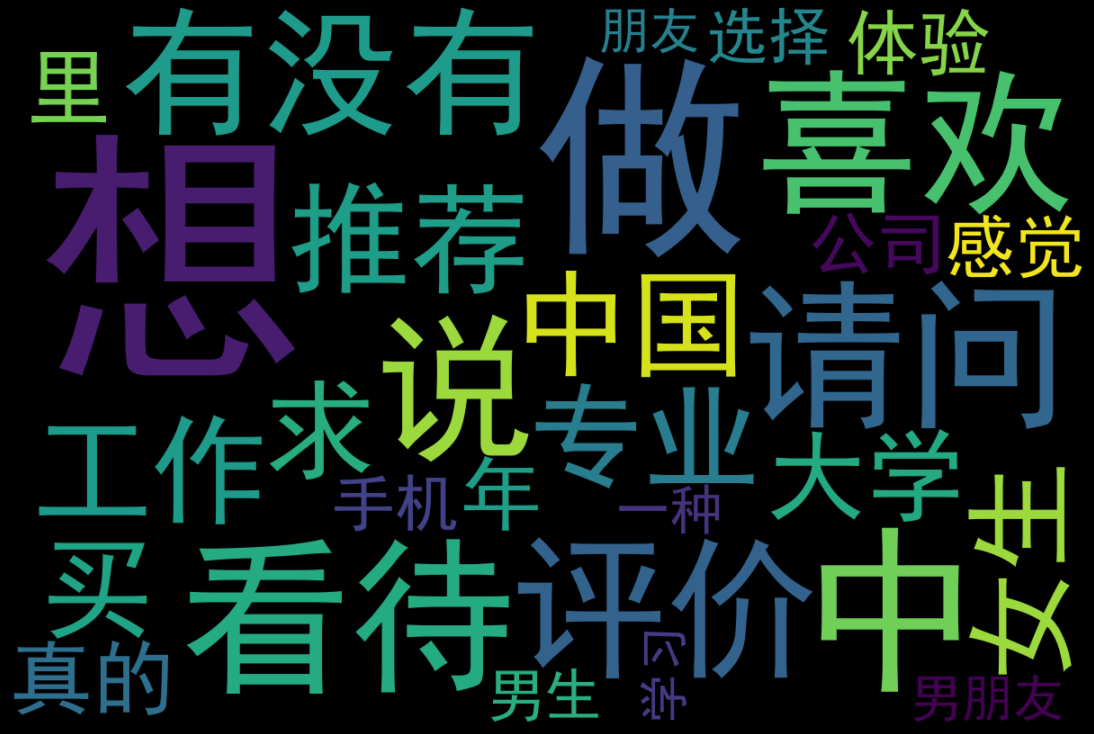

In [60]:
token_dict = {}

#df_no_stop_word = df_no_stop_word.head(500)
for each in df_no_stop_word.iterrows():
    token = each[1]['token']
    count = each[1]['token_count']
    token_dict[token] = count
    
#print(token_dict)

from wordcloud import WordCloud

wordcloud = WordCloud(font_path="data/SimHei.ttf", 
                      width=1200, 
                      height=800, 
                      max_font_size=300,
                      min_font_size=2,
                      max_words=2000, 
                      relative_scaling=1, 
                      margin=2,
                      normalize_plurals=False).generate_from_frequencies(token_dict)

%pylab inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)



In [48]:
country_set = set()
with open('data/countries.txt', 'r') as f:
    for w in f.readlines():
        country_set.add(w.strip())
print(len(country_set))

232


In [6]:
def is_country(word):
    if word in country_set:
        return True
    return False

df_no_stop_word['is_country'] = df_no_stop_word['token'].apply(is_country)

df_country = df_no_stop_word[df_no_stop_word['is_country'] == True].reset_index()[['token', 'token_count']]
print(df_country.head(30))

   token  token_count
0     中国       272093
1     日本        98827
2     美国        95784
3     英国        33549
4     韩国        29627
5     德国        18536
6    加拿大        15162
7    俄罗斯        12872
8     法国        12111
9     泰国         9842
10    印度         9739
11   意大利         8688
12   新加坡         6800
13  澳大利亚         6055
14   新西兰         5931
15    朝鲜         5106
16   西班牙         4349
17    越南         3320
18  马来西亚         3081
19    荷兰         2585
20    巴西         2559
21   菲律宾         2312
22    瑞士         2259
23   土耳其         2226
24   叙利亚         1945
25    蒙古         1717
26    瑞典         1605
27   以色列         1551
28    希腊         1443
29   阿根廷         1390


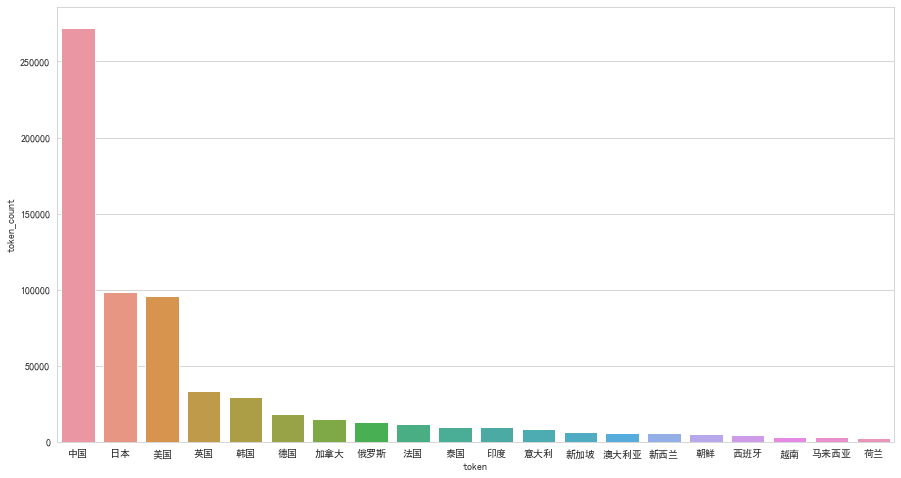

In [9]:
a4_dims = (15.0, 8)
fig, ax = plt.subplots(figsize=a4_dims)
df_country_top = df_country.head(20)
ax = sns.barplot(x='token', y='token_count', data=df_country_top, palette=None)